# Edited Nearest Neighbours
Thuật toán hoạt động như sau:

Huấn luyện một mô hình KNN trên dữ liệu (người dùng xác định số lượng láng giềng, thường là 3).

Tìm 3 láng giềng gần nhất của mỗi quan sát (hoặc số lượng láng giềng được xác định bởi người dùng trong bước 1).

Tìm nhãn của mỗi láng giềng (chúng ta biết nó, là nhãn mục tiêu trong bộ dữ liệu).

Hai chiến lược undersampling:

mode: Nếu hầu hết các láng giềng có cùng nhãn với quan sát, thì chúng ta giữ lại quan sát đó.

all: Nếu tất cả các láng giềng có cùng nhãn với quan sát, thì chúng ta giữ lại quan sát đó.

Theo cách khác, chúng ta loại bỏ quan sát khỏi bộ dữ liệu - undersample.

Bộ dữ liệu được undersample là bộ dữ liệu còn lại sau khi loại bỏ các quan sát.

Thuật toán loại bỏ các quan sát có lớp khác với lớp của các láng giềng của chúng. Những quan sát này thường là những quan sát khó phân loại và/hoặc gây nhiễu.

Trong thực tế, các mẫu của lớp đa số mà tương đồng quá nhiều với một quan sát thuộc lớp thiểu số sẽ bị loại bỏ.

Vì vậy, trong tinh thần, đây là sự đối lập của Condensed NN.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import EditedNearestNeighbours

## Create data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [2]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# how separate the classes are
                           random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

## Undersample with Edited Nearest Neighbours

[EditedNearestNeighbours](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.EditedNearestNeighbours.html)

### Well separated classes

In [3]:
# create data

X, y = make_data(sep=2)

# set up edited nearest neighbour

enn = EditedNearestNeighbours(
    sampling_strategy='auto',  # undersamples only the majority class
    n_neighbors=3, # the number of neighbours to examine
    kind_sel='all',  # all neighbours need to have the same label as the observation examined
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = enn.fit_resample(X, y)

In [4]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [5]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((978, 2), (978,))

The procedure removed a few observations closer to the minority class.

In [6]:
# number of minority class observations

y.value_counts()

0    983
1     17
dtype: int64

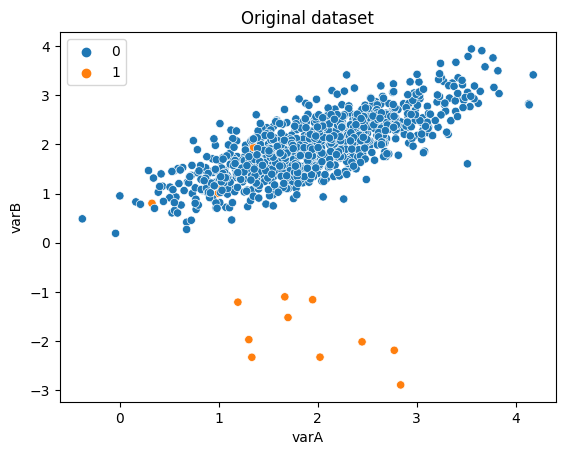

In [7]:
# plot original data

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

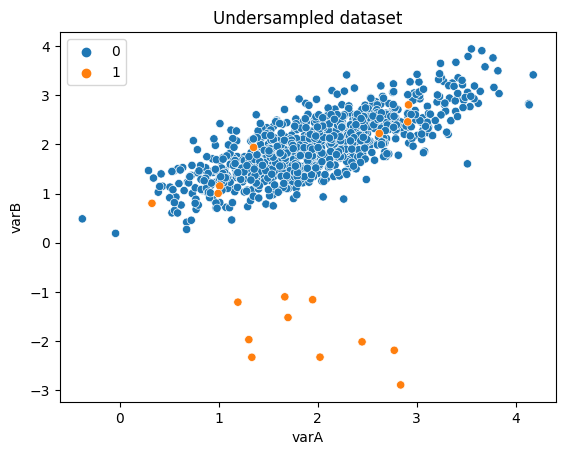

In [8]:
# plot undersampled data

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

In [10]:
# data không tách biệt lắm
X, y = make_data(sep=0)

# set up edited nearest neighbour transformer

enn = EditedNearestNeighbours(
    sampling_strategy='auto',  # resamples the majority class
    n_neighbors=3, # the number of neighbours to examine
    kind_sel='all',  # all neighbours need to agree
    n_jobs=4)  # I have 4 cores in my laptop


X_resampled, y_resampled = enn.fit_resample(X, y)

In [11]:
# original data

X.shape, y.shape

((1000, 2), (1000,))

In [12]:
# undersampled data

X_resampled.shape, y_resampled.shape

((960, 2), (960,))

As the classes are not so clearly distinguished, more samples were removed from the dataset.

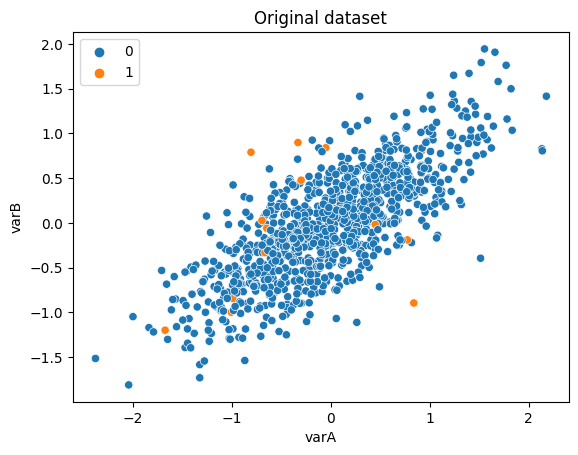

In [13]:
# plot original data

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

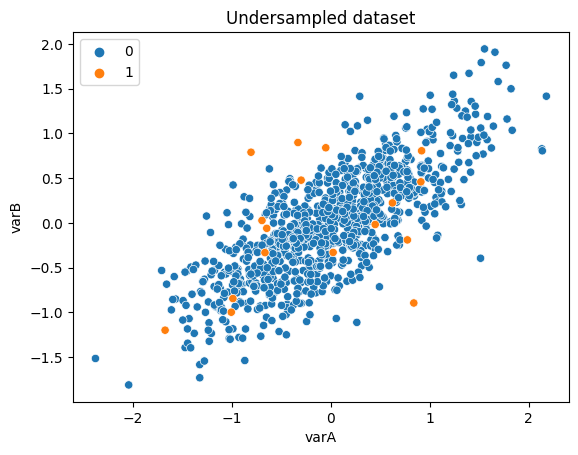

In [14]:
# plot undersampled data

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset') 
plt.show()